In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Read the data
cars = pd.read_csv(r"C:\Users\paidi\Desktop\Navvi\Cars.csv")
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [5]:
cars.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
76    False
77    False
78    False
79    False
80    False
Length: 81, dtype: bool

In [7]:
cars.isna().sum()

HP     0
MPG    0
VOL    0
SP     0
WT     0
dtype: int64

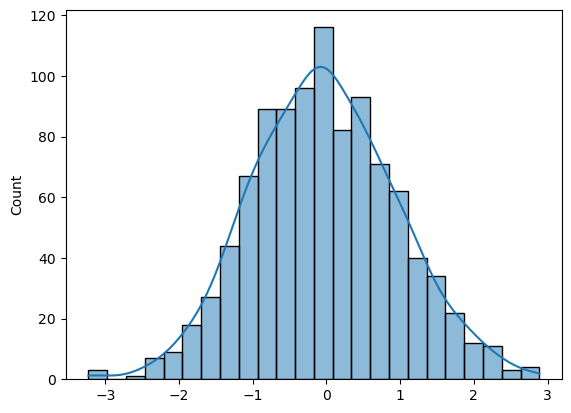

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
data = np.random.randn(1000)
sns.histplot(data, kde=True)
plt.show()

In [11]:
sns.boxplot

<function seaborn.categorical.boxplot(data=None, *, x=None, y=None, hue=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, fill=True, dodge='auto', width=0.8, gap=0, whis=1.5, linecolor='auto', linewidth=None, fliersize=None, hue_norm=None, native_scale=False, log_scale=None, formatter=None, legend='auto', ax=None, **kwargs)>

<Axes: xlabel='HP', ylabel='MPG'>

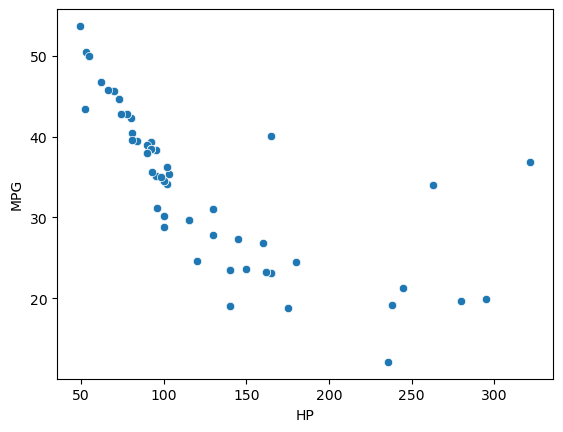

In [13]:
sns.scatterplot(x=cars['HP'],y=cars['MPG'])

<Axes: xlabel='WT', ylabel='MPG'>

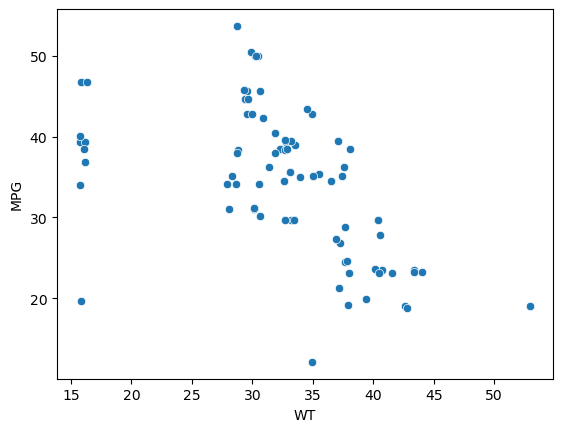

In [15]:
sns.scatterplot(x=cars['WT'],y=cars['MPG'])

<Axes: xlabel='SP', ylabel='MPG'>

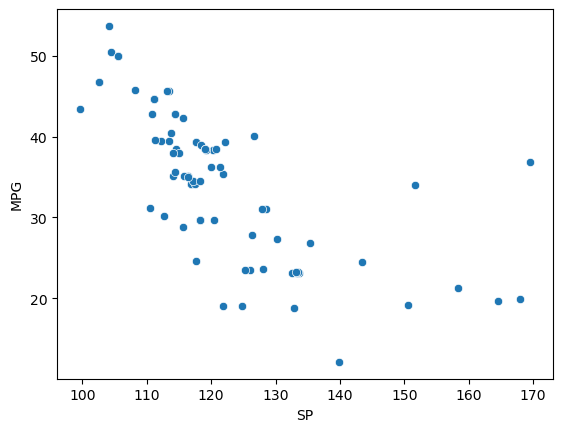

In [17]:
sns.scatterplot(x=cars['SP'],y=cars['MPG'])

<Axes: xlabel='VOL', ylabel='MPG'>

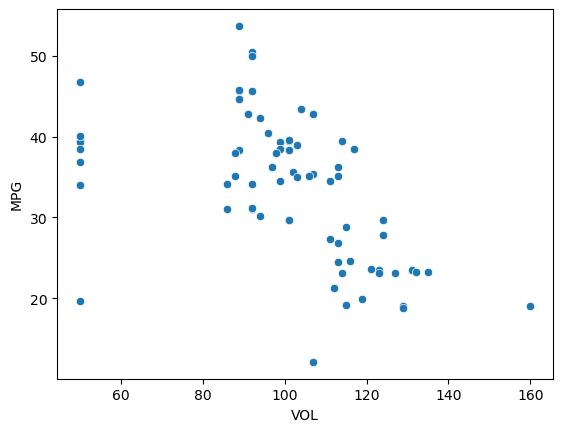

In [19]:
sns.scatterplot(x=cars['VOL'],y=cars['MPG'])

In [21]:
cars.corr()

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


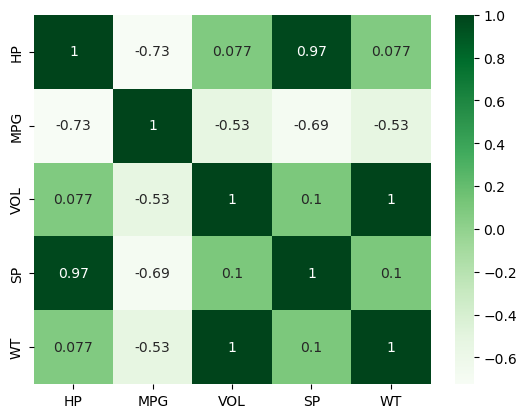

In [23]:
sns.heatmap(cars.corr(),cmap='Greens',annot=True)
plt.show()

In [25]:
#box plots is used to know the outliers.
# Correlation Coefficient is used to know the relationship netween two variables.

In [27]:
cars

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


In [29]:
cars.describe()

,HP,MPG,VOL,SP,WT
count,81.000000,81.000000,81.000000,81.000000,81.000000
mean,117.469136,34.422076,98.765432,121.540272,32.412577
std,57.113502,9.131445,22.301497,14.181432,7.492813
min,49.000000,12.101263,50.000000,99.564907,15.712859
25%,84.000000,27.856252,89.000000,113.829145,29.591768
50%,100.000000,35.152727,101.000000,118.208698,32.734518
75%,140.000000,39.531633,113.000000,126.404312,37.392524
max,322.000000,53.700681,160.000000,169.598513,52.997752


In [33]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
cars[['HP', 'WT', 'VOL', 'SP']] = sc.fit_transform(cars[['HP', 'WT','VOL','SP']])

In [35]:
np.round(cars.describe(),3)

,HP,MPG,VOL,SP,WT
count,81.000,81.000,81.000,81.000,81.000
mean,-0.000,34.422,0.000,0.000,0.000
std,1.006,9.131,1.006,1.006,1.006
min,-1.206,12.101,-2.200,-1.559,-2.243
25%,-0.590,27.856,-0.441,-0.547,-0.379
50%,-0.308,35.153,0.101,-0.236,0.043
75%,0.397,39.532,0.642,0.345,0.669
max,3.603,53.701,2.763,3.410,2.764


In [49]:
import statsmodels.formula.api as smf
ml_vol=smf.ols('MPG~VOL',data=cars).fit()
np.round(ml_vol.rsquared,2)

0.28

In [51]:
ml_vol.params

Intercept    34.422076
VOL          -4.801137
dtype: float64

In [53]:
import statsmodels.formula.api as smf
ml_sp=smf.ols('MPG~SP',data=cars).fit()
np.round(ml_sp.rsquared,2)

0.47

In [59]:
#Build model
import statsmodels.formula.api as smf
model = smf.ols('MPG~WT+VOL+SP+HP',data=cars).fit()

In [61]:
np.round(model.rsquared,2)

0.77